 # Toba's California Housing Price Prediction
**Author:** Adeyemi Toba  
**Date:** March, 12, 2025  
**Objective:** Predict the median house price in California using available housing features.


## Introduction
This project uses the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. We'll clean the data, train a linear regression model, and explore ways to improve performance.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [1]:

# Import necessary libraries
import seaborn as sns
import pandas as pd

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Display dataset info
titanic.info()

# Display first 10 rows
print(titanic.head(10))

# Check for missing values
print(titanic.isnull().sum())

# Display summary statistics
print(titanic.describe())

# Check correlations using only numeric features
print(titanic.corr(numeric_only=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the California housing dataset directly from `scikit-learn`.
- The `fetch_california_housing` function returns a dictionary-like object with the data.
- Convert it into a pandas DataFrame.
- Display just the first 10 rows using `head()`.

Example code:

data = fetch_california_housing(as_frame=True)
data_frame = data.frame

data_frame.head(10)

In [2]:
# Display basic dataset information
titanic.info()

# Display the first 10 rows
print(titanic.head(10))

# Check for missing values
print(titanic.isnull().sum())

# Display summary statistics for numeric features
print(titanic.describe())

# Check correlations using only numeric features
print(titanic.corr(numeric_only=True))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

This is a Markdown cell.

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [3]:
# Check data types and look for missing values
data_frame.info()

# Display summary statistics to understand the distribution of the data
data_frame.describe()

# Explicitly check for missing values in each column
data_frame.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

This is a Markdown cell


Analysis: 

1) How many data instances (also called data records or data rows) are there 20,640

2) How many features (also columns or attributes) are there 9

3) What are the names of the features? ("Feature" is used most often in ML projects.) MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal

4) Which features are numeric? All (MedInc, HouseAge, etc.)

5) Which features are categorical (non-numeric)None

6) Are there any missing values? How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value No
 
7) What else do you notice about the dataset? Are there any data issues?The California housing dataset is well-structured with diverse numeric features, free of missing values, and ready for further analysis and predictive modeling after addressing potential issues like feature scale variance and outliers.

## Section 2. Visualize Feature Distributions
### 2.1 Create histograms, boxplots, and scatterplots

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

First, histograms

Generate histograms for all numerical columns

Example code:

data_frame.hist(bins=30, figsize=(12, 8))

plt.show()

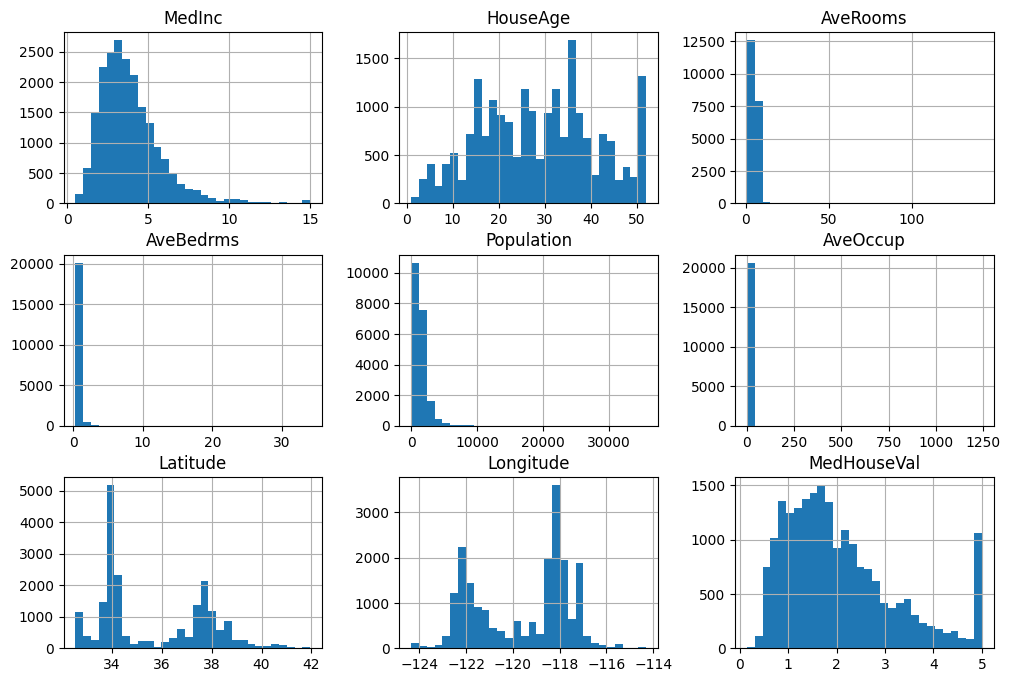

In [4]:
import matplotlib.pyplot as plt

# Generate histograms for each numerical feature
data_frame.hist(bins=30, figsize=(12, 8))

# Show the plots
plt.show()


Generate one Boxenplot for each column (good for large datasets)

Example code:

for column in data_frame.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=data_frame[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

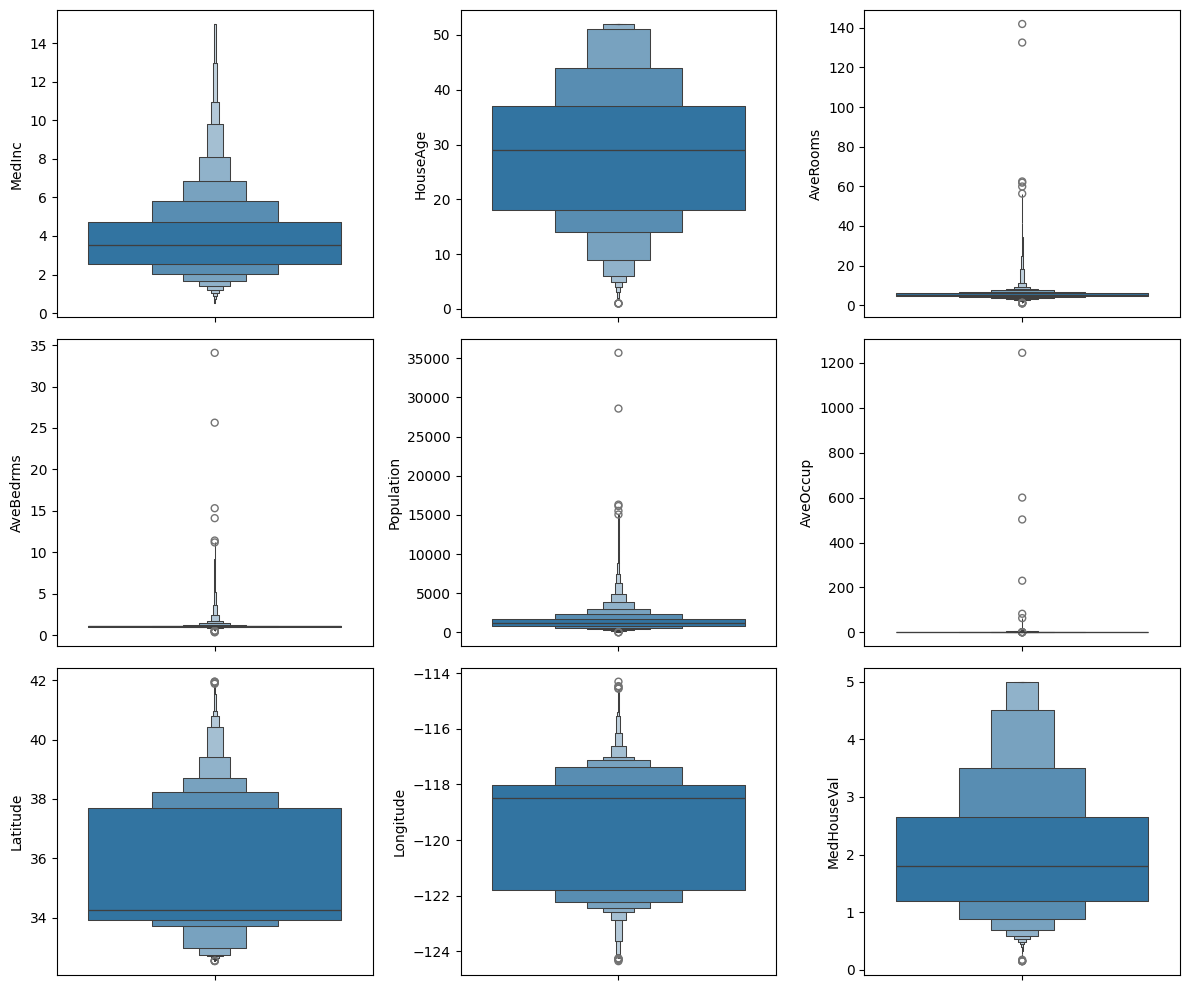

In [5]:
import seaborn as sns

# Create a larger figure for clearer visualization
plt.figure(figsize=(12, 10))

# Iterate over each numeric feature to create a boxenplot
for index, column in enumerate(data_frame.columns):
    plt.subplot(3, 3, index + 1)  # Adjust the grid dimensions according to the number of features
    sns.boxenplot(y=data_frame[column])

plt.tight_layout()  # Adjust subplots to reduce overlap
plt.show()


Third - Scatter Plots

Generate all Scatter plots (there is a LOT of data, so this will take a while)

Comment out after analysis to speed up the notebook.

Example code:

sns.pairplot(data_frame)

plt.show()

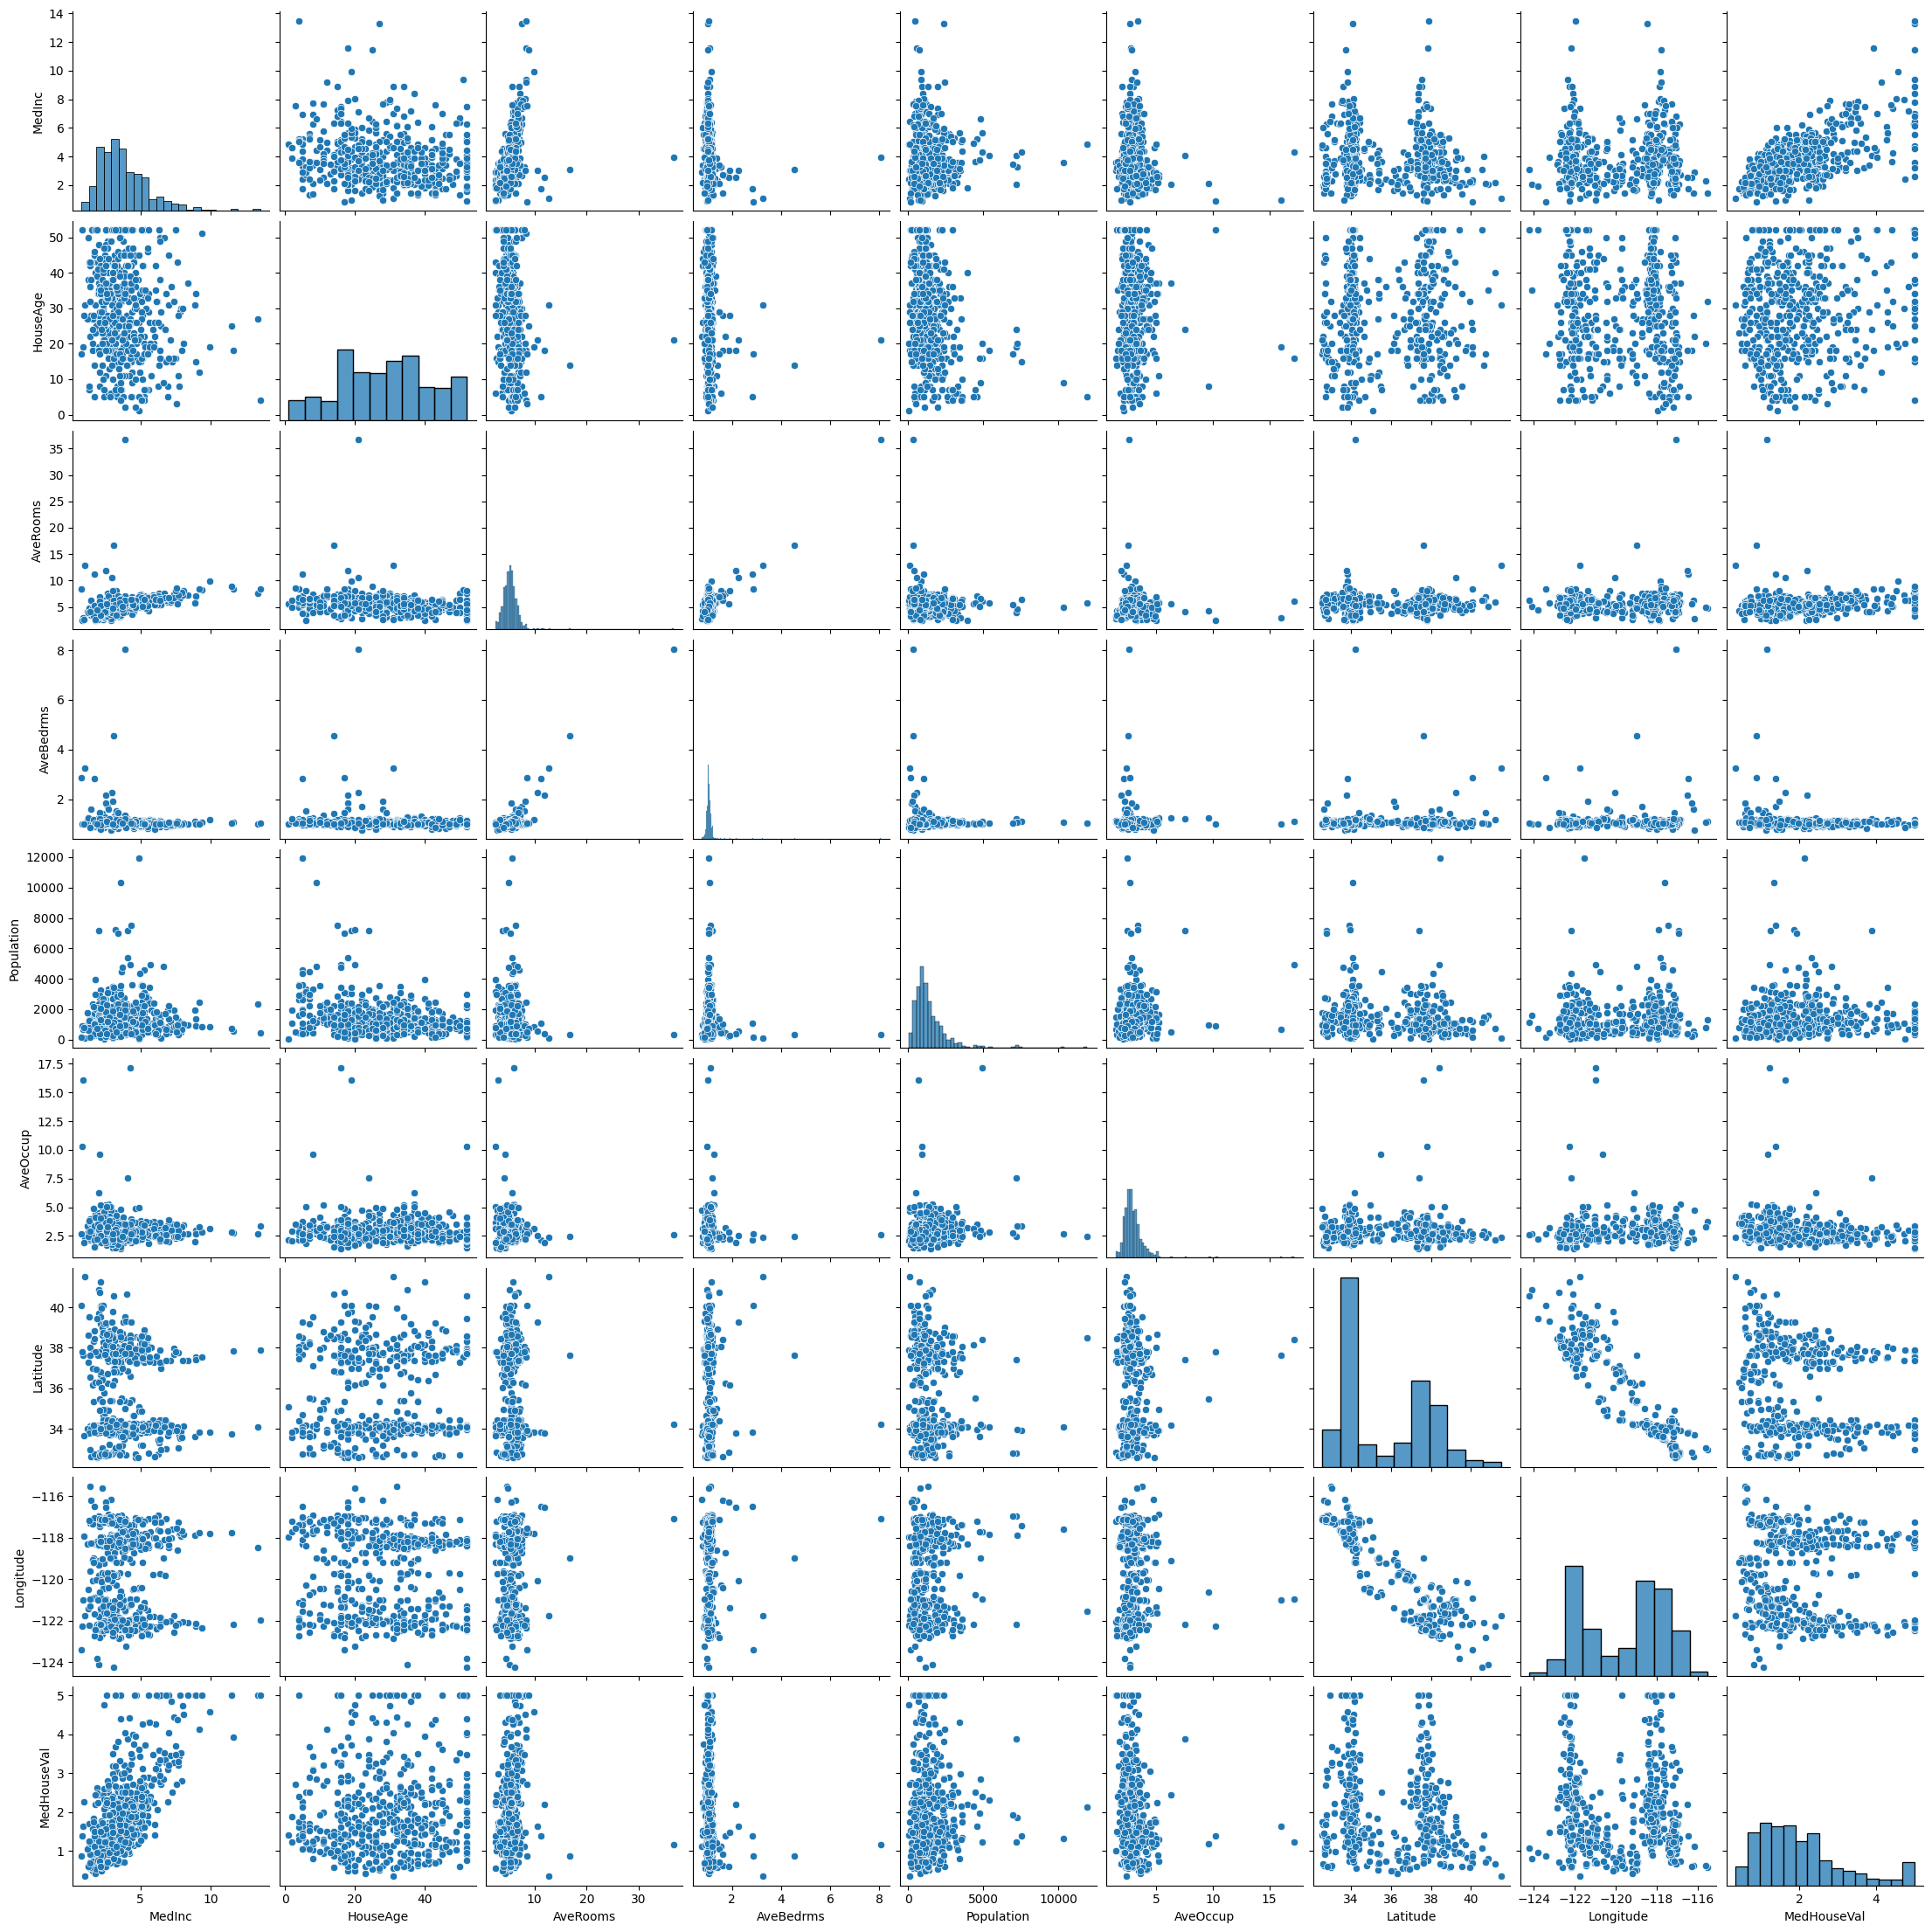

In [6]:
# Generate a pairplot for a subset of features or use a sample if the dataset is very large
sns.pairplot(data_frame.sample(500))  # Using a sample for quicker rendering and less clutter
plt.show()




This is a Markdown Cell.

## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

- Select `MedInc` and `AveRooms` as predictors.
- Select `MedHouseVal` as the target variable.

In the following, 
X is capitalized because it represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame


Example code:

features: list = ['MedInc', 'AveRooms']

target: str = 'MedHouseVal'

df_X = data_frame[features]

df_y = data_frame[target]


In [10]:
# Define the selected features (predictors)
features: list = ['MedInc', 'AveRooms']

# Define the target variable (what we want to predict)
target: str = 'MedHouseVal'

# Create input (X) and output (y) DataFrames
df_X = data_frame[features]
df_y = data_frame[target]

# Display the first few rows to confirm
df_X.head(), df_y.head()



(   MedInc  AveRooms
 0  8.3252  6.984127
 1  8.3014  6.238137
 2  7.2574  8.288136
 3  5.6431  5.817352
 4  3.8462  6.281853,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: MedHouseVal, dtype: float64)

This is a Markdown Cell.


## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)


Example code:

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42)


In [13]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16512, 2), (4128, 2), (16512,), (4128,))

This is a Markdown Cell.

### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.


Example code:


model = LinearRegression()

model.fit(X_train, y_train)


In [15]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Display model coefficients and intercept
model.coef_, model.intercept_


(array([ 0.43626089, -0.04017161]), np.float64(0.5972677793933256))

This is a Markdown Cell.

Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.


Example code:

y_pred = model.predict(X_test)


In [18]:

# Make predictions using the test set
y_pred = model.predict(X_test)

# Display the first 5 actual vs predicted values
import pandas as pd
results = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
results


,Actual,Predicted
0,0.47700,1.162302
1,0.45800,1.499135
2,5.00001,1.955731
3,2.18600,2.852755
4,2.78000,2.001677


This is a Markdown Cell. 

### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.


Example code:
  
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')



In [19]:

from sklearn.metrics import r2_score

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')


R²: 0.46


In [20]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')


MAE: 0.62


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the Mean Squared Error and then take the square root to get the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f'RMSE: {rmse:.2f}')


RMSE: 0.84



This is a Markdown Cell

Second:

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.


Example code:

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')




In [22]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error between the actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')



MAE: 0.62



This is a Markdown Cell

Third:

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.

Example code:

rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the Mean Squared Error first
mse = mean_squared_error(y_test, y_pred)

# Now compute the square root of MSE to get RMSE
rmse = sqrt(mse)

print(f'RMSE: {rmse:.2f}')



RMSE: 0.84
